<a href="https://colab.research.google.com/github/SeyfGoumeida/Projet_Mixt_Coclus_Partie1/blob/main/Projet_Mixt_Coclus_Partie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install nltk
!pip install gensim

In [17]:
import pandas as pd
import string
import re
import operator
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
#------------------------------------------------ 
import os
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
import operator
from functools import reduce
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from collections import Counter


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('/content/classic4.csv',header=0,index_col=0)
df


text label
0     Computer-Aided Analysis and Design of Informat...  cacm
1     Milestones in Cataloging In the case of the pr...  cisi
2     childhood psychosis. a description is given of...   med
3     neonatal hepatitis or familial neonatal obstru...   med
4     Handbook of Comparative Librarianship The firs...  cisi
...                                                 ...   ...
7090  throat and nose surgery in patients with const...   med
7091  Computers and Society: A Proposed Course for C...  cacm
7092                 Romberg Integration (Algorithm 60)  cacm
7093  Semantic Evaluation from Left to Right This pa...  cacm
7094       Toward Standards for Handwritten Zero and Oh  cacm

[7095 rows x 2 columns]

In [3]:
df["label"].value_counts().to_frame()

label
cacm   3204
cisi   1460
cran   1398
med    1033

In [16]:
from gensim.utils import tokenize
#sentance = [list(tokenize(s, deacc=True, lower=True)) for s in df['text']]
#Stop Words
#from gensim.parsing.preprocessing import remove_stopwords
#preprocceced_text = [remove_stopwords(s) for s in df['text']]
#Ponctuation


In [18]:

#punctuations
punctuations = string.punctuation
#stopwords
stop_words = list(STOP_WORDS)
def clean_text(
  string : str,
  ponctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
  stop_words = stop_words)->str : 

  #URLs
  string = re.sub(r"https?://\S+|www\.\S+",'',string)
  #html 
  string = re.sub(r'<.*?>','',string)
  #Numbers
  string = re.sub(r'[0-9]+','',string) 

  #Remove punctuations
  for x in string.lower():
    if x in punctuations:
      string = string.replace(x,"")
  #To lower
  string = string.lower()
  #Remove stop words
  lemmatizer = WordNetLemmatizer()
  string = ' '.join([lemmatizer.lemmatize(word) for word in string.split() if word not in stop_words])
  #Cleaning the whitespaces
  string = re.sub(r'\s', ' ', string).strip()

  return string

In [21]:
abstract = df['text'].to_list()
abstracts_cleaned = [clean_text(x) for x in abstract]

In [22]:
abstracts_cleaned

['computeraided analysis design information system paper describes use computeraided analysis design development integrated financial management system navy material command support activity nmcsa computeraided analysis consists set procedure computer program specifically designed aid process application software design computer selection performance evaluation major component problem statement language problem statement analyzer generator alternative design performance evaluator statement requirement written ad accurately defined system analyzed problem statement analyzer ad ad problem definition supplemented additional information order create complete problem definition analyzed problem statement translated form necessary use soda system optimization design algorithm program generation alternative specification program module logical database structure',
 'milestone cataloging case present study drlehnus interested applying method nonstandard way method type literature addressed far

#Word2Vec

In [106]:
from gensim.utils import tokenize
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in abstracts_cleaned]
sentance

[['computeraided',
  'analysis',
  'design',
  'information',
  'system',
  'paper',
  'describes',
  'use',
  'computeraided',
  'analysis',
  'design',
  'development',
  'integrated',
  'financial',
  'management',
  'system',
  'navy',
  'material',
  'command',
  'support',
  'activity',
  'nmcsa',
  'computeraided',
  'analysis',
  'consists',
  'set',
  'procedure',
  'computer',
  'program',
  'specifically',
  'designed',
  'aid',
  'process',
  'application',
  'software',
  'design',
  'computer',
  'selection',
  'performance',
  'evaluation',
  'major',
  'component',
  'problem',
  'statement',
  'language',
  'problem',
  'statement',
  'analyzer',
  'generator',
  'alternative',
  'design',
  'performance',
  'evaluator',
  'statement',
  'requirement',
  'written',
  'ad',
  'accurately',
  'defined',
  'system',
  'analyzed',
  'problem',
  'statement',
  'analyzer',
  'ad',
  'ad',
  'problem',
  'definition',
  'supplemented',
  'additional',
  'information',
  'ord

In [108]:
from gensim.models import word2vec
model1 = word2vec.Word2Vec(sentance,min_count=2)
model1.corpus_count

7095

In [71]:
vocab = model.wv.vocab
words = list(vocab)


In [122]:
model1.wv.vocab

{'computeraided': <gensim.models.keyedvectors.Vocab at 0x7ff17511dc10>,
 'analysis': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9a50>,
 'design': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9b90>,
 'information': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9dd0>,
 'system': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9e50>,
 'paper': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9e10>,
 'describes': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9110>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9310>,
 'development': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9fd0>,
 'integrated': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9f90>,
 'financial': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9350>,
 'management': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9410>,
 'navy': <gensim.models.keyedvectors.Vocab at 0x7ff1752e94d0>,
 'material': <gensim.models.keyedvectors.Vocab at 0x7ff1752e9510>,
 'command': <gensim.models.keyedvectors.Vocab at 0x7ff1752e95

In [38]:
print(abstracts_cleaned[0])

computeraided analysis design information system paper describes use computeraided analysis design development integrated financial management system navy material command support activity nmcsa computeraided analysis consists set procedure computer program specifically designed aid process application software design computer selection performance evaluation major component problem statement language problem statement analyzer generator alternative design performance evaluator statement requirement written ad accurately defined system analyzed problem statement analyzer ad ad problem definition supplemented additional information order create complete problem definition analyzed problem statement translated form necessary use soda system optimization design algorithm program generation alternative specification program module logical database structure


In [72]:
k = list(model.wv.vectors)
#Vecteur de mots 
print(k[0])
#la liste des mots 
words

[-1.4861796  -1.0390624  -1.3247006   0.35761395  1.4547045   0.394938
 -0.66569453 -0.4206104  -1.9452982  -0.7022081  -0.45507452 -0.2706417
  0.3522468   0.10104439  0.5832761   1.1771755  -1.2252976  -0.7890874
 -0.62955946 -0.40801987  0.14330554  0.16537447 -0.14941788 -0.12722085
  1.499833   -1.0184115   0.53670144  0.8530225  -1.5581743  -0.12619829
 -0.15089875  1.4267035   0.3973755   0.49693456  1.3108778   0.0279536
  0.17971206  0.5606212   0.17506042  0.3124802   0.6234704   0.89012873
 -1.539719    0.08997089 -0.6811319   0.19270973  1.2292511   0.92785156
 -0.6444904  -1.0625142   0.31550944  0.44282392  0.7789137  -0.69464207
  0.06901787  0.8881197   0.180809    0.98647743  0.87935454 -0.7799175
  0.254932    1.0841676   1.4308399  -1.731362    1.4939976   0.37829328
  0.34364772  0.07106487  1.3842719  -0.00855442 -0.21032196  1.3504659
 -0.0214967   0.00917266 -0.5906072  -0.15476596  0.29904252  0.19020352
 -0.13287422  0.50712204  0.7660098  -1.7873831   0.585941

['computeraided',
 'analysis',
 'design',
 'information',
 'system',
 'paper',
 'describes',
 'use',
 'development',
 'integrated',
 'financial',
 'management',
 'navy',
 'material',
 'command',
 'support',
 'activity',
 'consists',
 'set',
 'procedure',
 'computer',
 'program',
 'specifically',
 'designed',
 'aid',
 'process',
 'application',
 'software',
 'selection',
 'performance',
 'evaluation',
 'major',
 'component',
 'problem',
 'statement',
 'language',
 'analyzer',
 'generator',
 'alternative',
 'evaluator',
 'requirement',
 'written',
 'ad',
 'accurately',
 'defined',
 'analyzed',
 'definition',
 'supplemented',
 'additional',
 'order',
 'create',
 'complete',
 'translated',
 'form',
 'necessary',
 'optimization',
 'algorithm',
 'generation',
 'specification',
 'module',
 'logical',
 'database',
 'structure',
 'cataloging',
 'case',
 'present',
 'study',
 'interested',
 'applying',
 'method',
 'nonstandard',
 'way',
 'type',
 'literature',
 'addressed',
 'far',
 'proposed',


In [124]:
model1.similarity('worker', 'treated')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.64467376

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'au

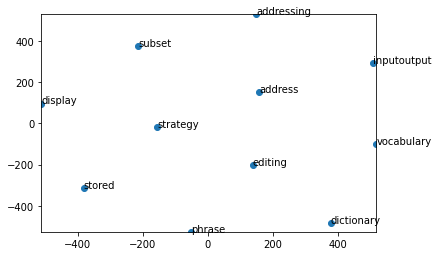

In [86]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word, size):
    
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]
    
  close_words = model.similar_by_word(word)

  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model[wrd_score[0]]
    word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
  tsne = TSNE(n_components=2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)
  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)
  for label, x, y in zip(word_labels, x_coords, y_coords):
      plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
  plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
  plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
  plt.show()

display_closestwords_tsnescatterplot(model, 'address', 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


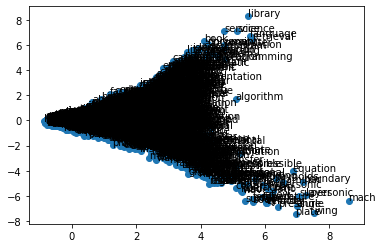

In [102]:
from matplotlib import pyplot
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [112]:
!wget http://nlp.stanford.edu/data/y
!unzip glove*.zip

--2021-12-02 10:33:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-02 10:33:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-02 10:33:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [113]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Indexing word vectors.
Found 400000 word vectors.


In [119]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [126]:
from gensim.models import KeyedVectors

model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentance)
total_examples = model_2.corpus_count

model = KeyedVectors.load_word2vec_format("glove.6B.300d.txt", binary=False)
model_2.build_vocab([list(model.vocab.keys())], update=True)
model_2.intersect_word2vec_format("glove.6B.300d.txt", binary=False, lockf=1.0)
model_2.train(sentance, total_examples=total_examples, epochs=model_2.iter)

# fit a 2d PCA model to the vectors
X = model_2[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

ValueError: ignored

Word2Vec Pré-trained

In [87]:
import gensim.downloader as api
corpus = api.load('text8')
import inspect
print(inspect.getsource(corpus.__class__))
from gensim.models.word2vec import Word2Vec
model = Word2Vec(corpus)

[==================================================] 100.0% 31.6/31.6MB downloaded
class Dataset(object):
    def __init__(self, fn):
        self.fn = fn

    def __iter__(self):
        corpus = Text8Corpus(self.fn)
        for doc in corpus:
            yield doc



In [91]:
print(model.wv.most_similar('key'))
print(model1.wv.most_similar('key'))



[('major', 0.5874136090278625), ('block', 0.5605428814888), ('crucial', 0.54579097032547), ('cryptographic', 0.5411548614501953), ('default', 0.5150142312049866), ('string', 0.5132936239242554), ('specific', 0.5105298161506653), ('keyboard', 0.5021976232528687), ('shift', 0.4995584487915039), ('unique', 0.49770766496658325)]
[('operation', 0.9920803904533386), ('paged', 0.9908394813537598), ('retrieve', 0.9899535775184631), ('word', 0.9883667230606079), ('access', 0.9877713322639465), ('query', 0.9853100180625916), ('search', 0.9842303991317749), ('retrieved', 0.983039140701294), ('instruction', 0.9829862713813782), ('vocabulary', 0.9828054308891296)]


In [95]:
print(model.wv['key'][:5])
print(model1.wv['key'][:5])


[-0.27264526 -0.3968133   0.89121467 -0.7180482   1.0038196 ]
[-0.3624675  -0.49232382 -0.21577261  0.3022394   0.63330215]
